In [1]:
import torch

from torchflare.interpreters import GradCam, GradCamPP, visualize_cam

from PIL import Image
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# Some basic stuff required for both tests.
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

preprocess = transforms.Compose([transforms.ToTensor(), normalize])
image = Image.open("tigercat.jpg")
# convert image to tensor
tensor = preprocess(image)

# reshape 4D tensor (N, C, H, W)
tensor = tensor.unsqueeze(0)


<IPython.core.display.Javascript object>

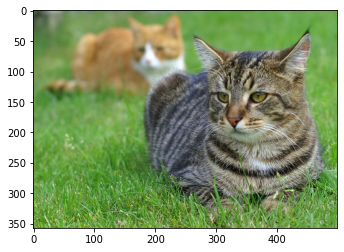

<IPython.core.display.Javascript object>

In [4]:
plt.imshow(image)

In [5]:
model = torchvision.models.resnet18(pretrained=True)
target_layer = model.layer4[1].conv2

<IPython.core.display.Javascript object>

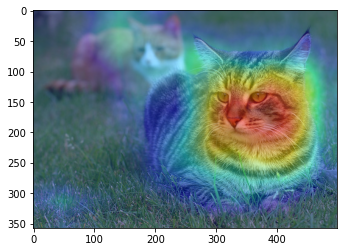

<IPython.core.display.Javascript object>

In [6]:
cam_model = GradCam(model=model, target_layer=target_layer)
cam = cam_model(tensor, target_category=282)

image = np.array(image)
visualize_cam(image=image, cam=cam)

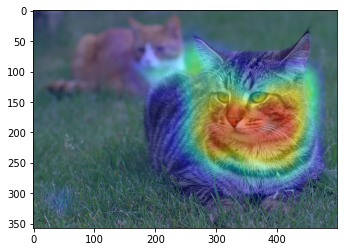

<IPython.core.display.Javascript object>

In [7]:
cam_model = GradCamPP(model=model, target_layer=target_layer)
campp = cam_model(tensor, target_category=282)
visualize_cam(image=image, cam=campp)